In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\Buildables Internship\Cyber_Bullying\data\cyberbullying_tweets.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Hp\AppData\Local\Temp\ipykernel_7276\3694185176.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('D:\Buildables Internship\Cyber_Bullying\data\cyberbullying_tweets.csv')


In [4]:
df['tweet_text'][32360]

"Millie, you keep your head up high. I was bullied in school and I let it change my schooling. Bullies are wimps, they are cowards, they are not worth you worrying. Show them each day that they will not win, you look a sweet little girl. Enjoy your life don't stop being you."

In [5]:
df.sample(5)

,tweet_text,cyberbullying_type
15900,@TinyAddiction Damn Feminazi,gender
3943,@GregTheTerrible block while waiting indefinit...,not_cyberbullying
2341,@_Somanxx okeey ♥,not_cyberbullying
22117,Yea same way when ppl like u say why Islamopho...,religion
9036,"Go fuck yourself Kat, stupid slut #MKR #nofuck...",gender


# Pre Processing

In [6]:
df.shape

(47692, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [8]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
encoder.fit_transform(df['cyberbullying_type'])

array([3, 3, 3, ..., 1, 1, 1], shape=(47692,))

In [11]:
df['target'] = encoder.fit_transform(df['cyberbullying_type'])

In [12]:
df.sample(5)

,tweet_text,cyberbullying_type,target
5566,16 hours and 7 minutes OMG YOU GUYS I CANT EVEN,not_cyberbullying,3
568,@98Halima @cdnKhadija @rfrankh53 @BilalIGhumma...,not_cyberbullying,3
22936,Humanity again shameful becoz of sum stupid pp...,religion,5
46856,I just defined it. It comes from a long line o...,ethnicity,1
47147,"To be honest, I only like Obama cuz he a nigga...",ethnicity,1


In [13]:
# Duplicate Values
df.duplicated().sum()


np.int64(36)

In [14]:
# Want to know the distribution of target variable which indicates the type of cyberbullying
df['target'].value_counts()
# 0 indicates age
# 1 indicates ethnicity
# 2 indicates gender
# 3 indicates not_cyberbullying
# 4 indicates other_cyberbullying
# 5 indicates religion

target
5    7998
0    7992
2    7973
1    7961
3    7945
4    7823
Name: count, dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop(columns=['cyberbullying_type'],inplace=True)

# EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df['target'].value_counts() / df.shape[0] * 100
# 0 indicates age
# 1 indicates ethnicity
# 2 indicates gender
# 3 indicates not_cyberbullying
# 4 indicates other_cyberbullying
# 5 indicates religion

target
5    16.780678
0    16.770186
1    16.700940
2    16.677858
3    16.654776
4    16.415562
Name: count, dtype: float64

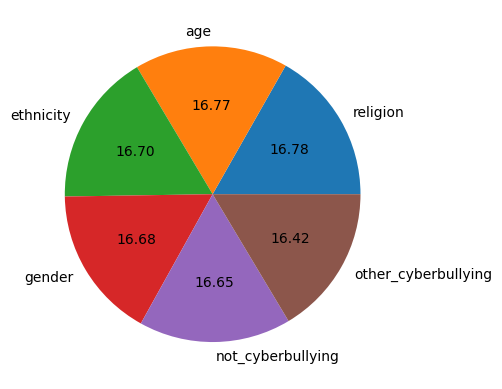

In [20]:
plt.pie(df['target'].value_counts(),labels = ['religion','age','ethnicity','gender','not_cyberbullying','other_cyberbullying'],autopct="%.2f")
plt.show()

In [21]:
df['tweet_text'].apply(len)

0         61
1        115
2         60
3        103
4        103
        ... 
47687    234
47688    276
47689    104
47690     90
47691     76
Name: tweet_text, Length: 47656, dtype: int64

In [22]:
df['num_Char'] = df['tweet_text'].apply(len)
df.head()

,tweet_text,target,num_Char
0,"In other words #katandandre, your food was cra...",3,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,115
2,@XochitlSuckkks a classy whore? Or more red ve...,3,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,103
4,@RudhoeEnglish This is an ISIS account pretend...,3,103


In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Num of Words
df['num_Words'] = df['tweet_text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,tweet_text,target,num_Char,num_Words
0,"In other words #katandandre, your food was cra...",3,61,13
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,115,25
2,@XochitlSuckkks a classy whore? Or more red ve...,3,60,12
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,103,23
4,@RudhoeEnglish This is an ISIS account pretend...,3,103,22


In [25]:
# Num of Sentence
df['num_Sen'] = df['tweet_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.sample(5)

,tweet_text,target,num_Char,num_Words,num_Sen
36695,i love you all girlies who are so into girl po...,0,180,41,1
5007,My daddy was a bedroom bully.. & had a bully baby,3,49,12,1
20271,You fuking pussies. Can't even say. Muslim you...,5,259,68,13
15465,"Allegedly, Chris Sabat and friends made a very...",2,151,31,4
43194,"I'm a dumb nigger , I fuck niggers",1,34,9,1


In [27]:
df.describe()

,target,num_Char,num_Words,num_Sen
count,47656.000000,47656.000000,47656.000000,47656.000000
mean,2.495866,136.258519,28.779041,2.048367
std,1.710388,85.061642,18.011206,1.396486
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,78.000000,17.000000,1.000000
50%,2.000000,124.000000,25.000000,2.000000
75%,4.000000,180.000000,38.000000,3.000000
max,5.000000,4962.000000,1023.000000,68.000000


<Axes: xlabel='num_Char', ylabel='Count'>

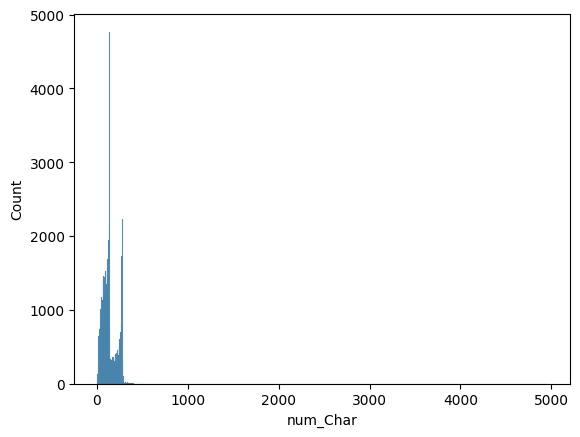

In [28]:
sns.histplot(df['num_Char'])

<Axes: xlabel='num_Words', ylabel='Count'>

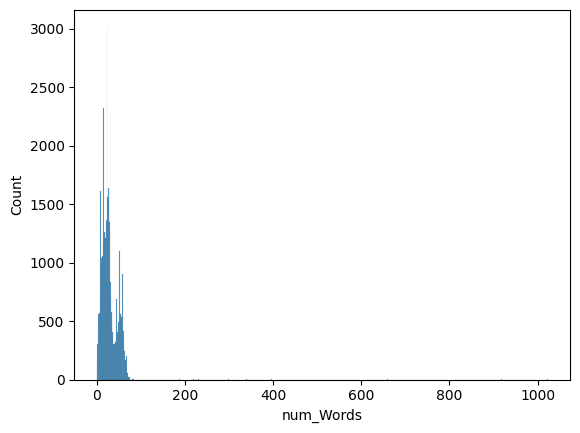

In [29]:
sns.histplot(df['num_Words'])

<Axes: xlabel='num_Sen', ylabel='count'>

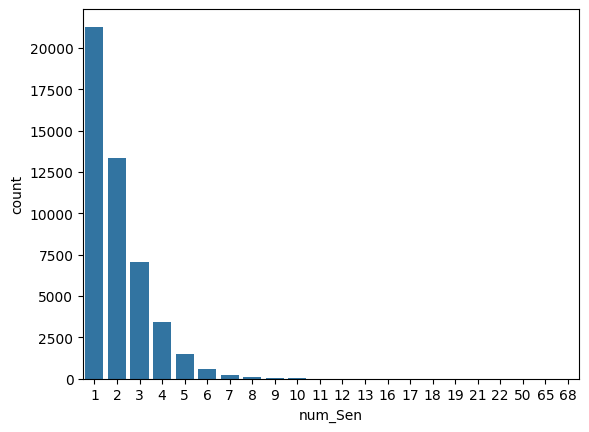

In [30]:
sns.barplot(df['num_Sen'].value_counts())

In [31]:
df[df['target']==0].describe() # 0 indicates age

,target,num_Char,num_Words,num_Sen
count,7992.0,7992.000000,7992.000000,7992.000000
mean,0.0,173.541166,37.041166,2.143769
std,0.0,80.037443,17.615690,1.440507
min,0.0,11.000000,2.000000,1.000000
25%,0.0,105.000000,22.000000,1.000000
50%,0.0,171.000000,36.000000,2.000000
75%,0.0,252.000000,53.000000,3.000000
max,0.0,1578.000000,323.000000,19.000000


In [32]:
df[df['target']==1].describe() # 1 indicates ethnicity

,target,num_Char,num_Words,num_Sen
count,7959.0,7959.000000,7959.000000,7959.000000
mean,1.0,139.298027,30.388240,2.068853
std,0.0,76.690291,16.675624,1.360792
min,1.0,5.000000,2.000000,1.000000
25%,1.0,88.000000,19.000000,1.000000
50%,1.0,126.000000,27.000000,2.000000
75%,1.0,167.000000,37.000000,3.000000
max,1.0,1857.000000,396.000000,22.000000


In [33]:
df[df['target']==2].describe() # 2 indicates gender

,target,num_Char,num_Words,num_Sen
count,7948.0,7948.000000,7948.000000,7948.000000
mean,2.0,136.498742,29.298188,1.997609
std,0.0,71.387053,15.579043,1.300703
min,2.0,2.000000,1.000000,1.000000
25%,2.0,89.000000,19.000000,1.000000
50%,2.0,129.000000,27.000000,2.000000
75%,2.0,147.000000,34.000000,3.000000
max,2.0,1423.000000,299.000000,18.000000


In [34]:
df[df['target']==3].describe() # 3 indicates not_cyberbullying

,target,num_Char,num_Words,num_Sen
count,7937.0,7937.000000,7937.000000,7937.000000
mean,3.0,83.080383,17.660577,1.668893
std,0.0,45.371780,9.568945,0.903751
min,3.0,2.000000,1.000000,1.000000
25%,3.0,49.000000,11.000000,1.000000
50%,3.0,81.000000,17.000000,1.000000
75%,3.0,119.000000,24.000000,2.000000
max,3.0,1790.000000,359.000000,21.000000


In [35]:
df[df['target'] == 4].describe() # 4 indicates other_cyberbullying

,target,num_Char,num_Words,num_Sen
count,7823.0,7823.000000,7823.000000,7823.000000
mean,4.0,85.690784,18.408539,1.778602
std,0.0,90.812794,19.444781,1.510660
min,4.0,1.000000,1.000000,1.000000
25%,4.0,51.000000,11.000000,1.000000
50%,4.0,83.000000,18.000000,2.000000
75%,4.0,121.000000,25.000000,2.000000
max,4.0,4962.000000,1023.000000,68.000000


In [36]:
df[df['target'] == 5].describe() # 5 indicates religion

,target,num_Char,num_Words,num_Sen
count,7997.0,7997.000000,7997.000000,7997.000000
mean,5.0,197.981993,39.584469,2.623609
std,0.0,71.929273,15.125530,1.557031
min,5.0,7.000000,3.000000,1.000000
25%,5.0,134.000000,25.000000,1.000000
50%,5.0,212.000000,42.000000,2.000000
75%,5.0,269.000000,53.000000,4.000000
max,5.0,568.000000,110.000000,17.000000


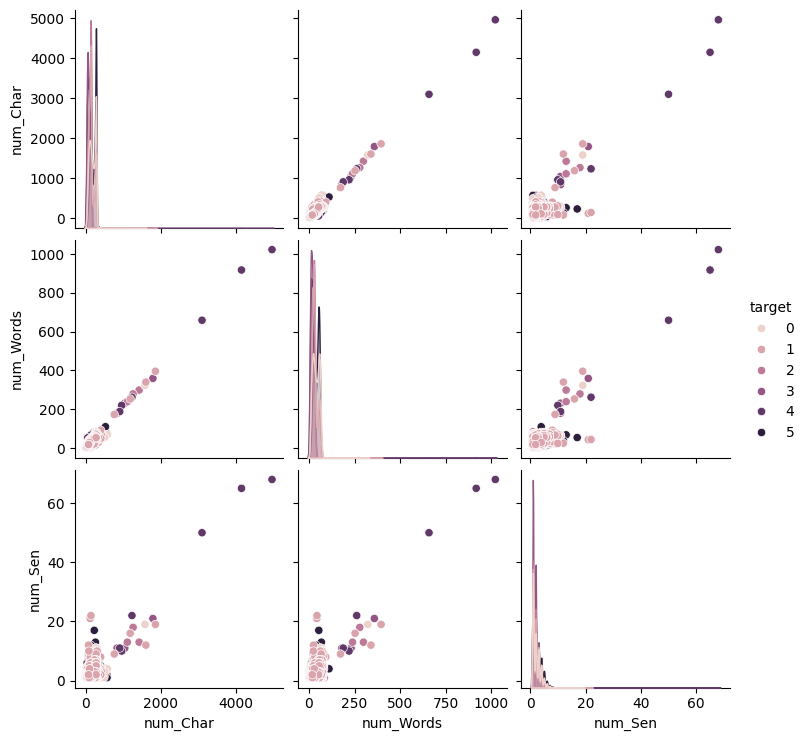

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

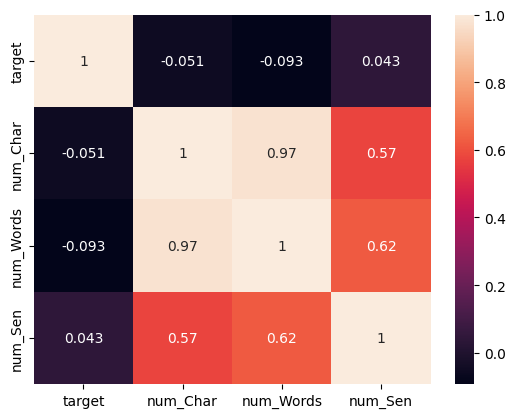

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Proprecessing + More EDA

In [39]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [40]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)


    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t,pos='v') for t in tokens]
    
    return " ".join(tokens)

In [41]:
df['transformed_text'] = df['tweet_text'].apply(transform_text)

In [42]:
df.sample(5)

,tweet_text,target,num_Char,num_Words,num_Sen,transformed_text
33166,Love to see girls who bullied me in high schoo...,0,128,28,1,love see girls bully high school tweet cyberbu...
22411,"You idiot from PFI, you mentioned you worked i...",5,269,54,6,idiot pfi mention work software company 15 yea...
13894,@DQTwitchStream ...if they hadn't just flushed...,2,93,20,1,dqtwitchstream flush cup chance incline argue
15762,@HPluckrose @Feminazi_Front how can you call t...,2,137,24,2,hpluckrose call inequality dynamic exist neces...
9124,sharing #suaju After Nancy Binay Skin Colour P...,2,132,25,1,share suaju nancy binay skin colour pun gay fi...


# Model Building and Improving

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4500)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(47656, 4500))

In [70]:
# appending the num_character col to X
# X = np.hstack((X,df['num_Char'].values.reshape(-1,1)))

In [71]:
X.shape

(47656, 4500)

In [72]:
y = df['target'].values
y

array([3, 3, 3, ..., 1, 1, 1], shape=(47656,))

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(multi_class='multinomial',max_iter=1000)
rfc = RandomForestClassifier()

In [51]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred1))

0.5817247167436005


In [52]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred2))

0.7788501888375997


In [66]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred3))

0.8148342425514058


In [76]:
lr.fit(X_train,y_train)
ypred4 = lr.predict(X_test)
print(accuracy_score(y_test,ypred4))

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8300461603021402


In [78]:
print(precision_score(y_test,ypred4,average='weighted'))

0.83281513250927


In [56]:
# TFIDF --> MNB

In [60]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')

    return accuracy,precision

In [79]:
import pickle

# Pickle the trained Logistic Regression model
with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Pickle the fitted TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

In [85]:
df['tweet_text'][0]

'In other words #katandandre, your food was crapilicious! #mkr'